# <span style= 'color:blue'>text no needed elimination(all job after contour extraction and fixed resize (1000,600): </span>
---

In [1]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import PIL
from PIL import Image

# <h2><span style= 'color:noire'>1-using easyocr for position detection of label: </h2></span>
---

In [2]:
IMAGE_PATH = 'ali.jpg'

In [3]:
reader = easyocr.Reader(['ar'])
result = reader.readtext(IMAGE_PATH)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[328, 12], [695, 12], [695, 89], [328, 89]],
  'الجمهوريف التونسية',
  0.4350950410495163],
 [[[252, 64], [767, 64], [767, 177], [252, 177]],
  'بطاقهالتعرف الوطنيه',
  0.4383489186394862],
 [[[370, 203], [646, 203], [646, 263], [370, 263]],
  '09625097',
  0.9998631453038355],
 [[[598, 282], [842, 282], [842, 358], [598, 358]],
  'السعيدي',
  0.9317348169506132],
 [[[853, 295], [946, 295], [946, 338], [853, 338]],
  'اللقب',
  0.8335579313991517],
 [[[329, 391], [369, 391], [369, 437], [329, 437]], '|ر', 0.06536002769727547],
 [[[442, 394], [946, 394], [946, 468], [442, 468]],
  'بن محمد بن عبدالآه "',
  0.4776097271827977],
 [[[415, 453], [767, 453], [767, 518], [415, 518]],
  '28 جويلية 1994',
  0.6529135042183538],
 [[[783, 471], [939, 471], [939, 515], [783, 515]],
  'ناخ الولا دة',
  0.4177608236167046],
 [[[720, 518], [939, 518], [939, 574], [720, 574]],
  'مكانها تونس',
  0.31988201022145785],
 [[[756.7716559418753, 359.42913985468846],
   [843.6787768653109, 345.24379885460

In [4]:
img=cv2.imread(IMAGE_PATH)
for detection in result :
    top_left=tuple([int(val) for val in detection[0][0]])
    bottom_right=tuple([int(val) for val in detection[0][2]])
    text=detection[1]
    font =cv2.FONT_HERSHEY_SIMPLEX
    img=cv2.rectangle(img,top_left,bottom_right,(0,255,0),2)

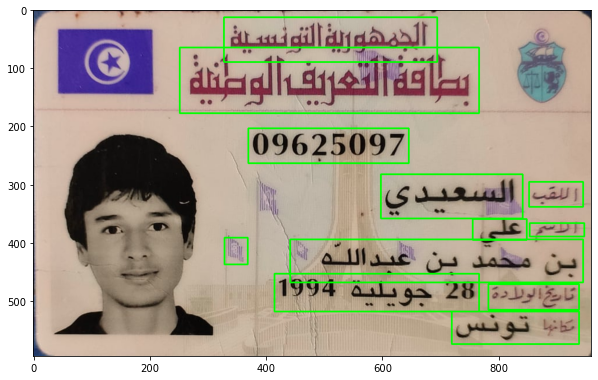

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

# <h2><span style= 'color:noire'>2-resizing picture (after contour extraction ) to fixed resize(1000,600) : </h2></span>
---

In [6]:
image = Image.open(IMAGE_PATH)
print(image.size)

(960, 595)


In [7]:
resized_image = image.resize((1000,600))
print(resized_image.size)

(1000, 600)


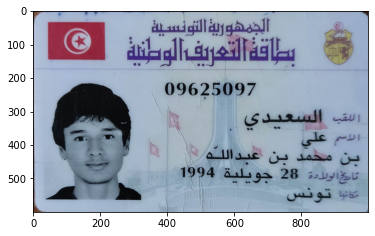

In [8]:
plt.imshow(resized_image)

In [9]:
resized_image.save('resized_nearest.jpg')

# <h2><span style= 'color:noire'>3-detection aproximative des coordonnees de toutes les attributs </h2></span>
---

In [10]:
reader = easyocr.Reader(['ar'])
result = reader.readtext('resized_nearest.jpg')
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[[[[341, 12], [723, 12], [723, 90], [341, 90]],
  'الجمهوريف التونسيذ',
  0.2754255836692516],
 [[[265, 67], [799, 67], [799, 177], [265, 177]],
  'بطاقهالتعرف الوطنيذ',
  0.16078943240056287],
 [[[386, 206], [672, 206], [672, 262], [386, 262]],
  '09625097',
  0.999790816127914],
 [[[622, 284], [876, 284], [876, 360], [622, 360]],
  'السعيدي',
  0.9836491491442356],
 [[[891, 300], [985, 300], [985, 336], [891, 336]],
  'اللق',
  0.9334833025932312],
 [[[345, 401], [385, 401], [385, 439], [345, 439]], 'ر1', 0.05238303253057655],
 [[[509, 399], [769, 399], [769, 463], [509, 463]],
  'بن عبداللحه',
  0.41829533250083145],
 [[[781, 409], [984, 409], [984, 470], [781, 470]],
  'بن محمد',
  0.8540240321974034],
 [[[433, 457], [721, 457], [721, 525], [433, 525]],
  'جويلية 1994',
  0.8978051303362616],
 [[[733, 463], [797, 463], [797, 507], [733, 507]], '28', 0.9997712345711199],
 [[[816, 474], [978, 474], [978, 522], [816, 522]],
  'ناخ ! لولا دة',
  0.6895811749748745],
 [[[747, 520], [980

# <h2><span style= 'color:noire'>3-fontion define pour obtenir milieu de contour de chaque attribut: </h2></span>
---

In [11]:
import math
import numpy as np
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

# <h2><span style= 'color:noire'>4-obtenir coordonnes des contours: </h2></span>
---

In [12]:
box=result[0][0]

In [13]:
box

[[341, 12], [723, 12], [723, 90], [341, 90]]

In [14]:
x0, y0 = box[0]
x1, y1 = box[1]
x2, y2 = box[2]
x3, y3 = box[3]

In [15]:
image=cv2.imread('resized_nearest.jpg')

# <h2><span style= 'color:noire'>5-appliquer les mask pour detecter les cibles a eliminer : </h2></span>
---

In [16]:
x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

In [17]:
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

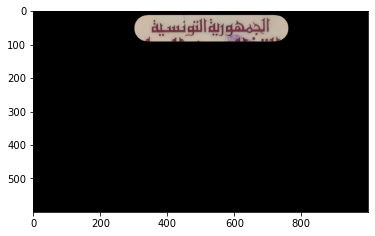

In [18]:
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked)

# <h2><span style= 'color:noire'>6-obtenir l image nettoyee: </h2></span>
---

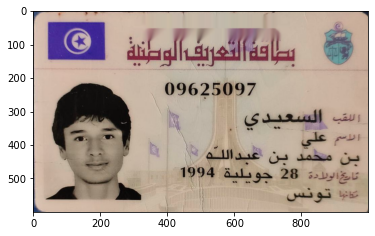

In [19]:
img_inpainted = cv2.inpaint(image, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)

# <h2><span style= 'color:noire'>7-nettoyer image de tout les textes: </h2></span>
---

In [20]:
mask = np.zeros(image.shape[:2], dtype="uint8")
for boxs in result:
    box=boxs[0]
    x0, y0 = box[0]
    x1, y1 = box[1]
    x2, y2 = box[2]
    x3, y3 = box[3]
    x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
    x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
    thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
    
    cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

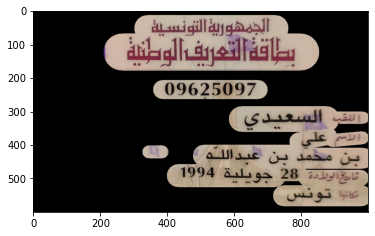

In [21]:
masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked)

True

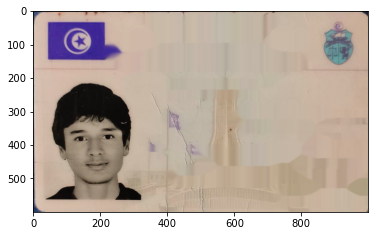

In [22]:
img_inpainted = cv2.inpaint(image, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)
cv2.imwrite('full_text_elimination.jpg', img_inpainted)

# <h2><span style= 'color:noire'>8-fixer position des contours a eliminer: </h2></span>
---

In [23]:
result_position_eliminated=[[[341, 12], [723, 12], [723, 90], [341, 90]],[[265, 67], [799, 67], [799, 177], [265, 177]],[[891, 300], [985, 300], [985, 336], [891, 336]],[[345, 415], [385, 415], [385, 439], [345, 439]],[[350, 415], [1000, 415], [1000, 463], [350, 463]],[[350, 415], [984, 415], [984, 470], [350, 470]],[[350, 457], [721, 457], [721, 525], [350, 525]],[[350, 463], [797, 463], [797, 507], [350, 507]],[[350, 474], [978, 474], [978, 522], [350, 522]],[[350, 520], [980, 520], [980, 582], [350, 582]],[[892.4050955543422, 367.33171977498705],
 [982.5330274548088, 359.1244422153484],
 [984.5949044456578, 397.66828022501295],
 [894.4669725451912, 405.8755577846516]]]

# <h2><span style= 'color:noire'>9-nettoyer l image des textes cibles: </h2></span>
---

In [24]:
mask = np.zeros(image.shape[:2], dtype="uint8")
for box in result_position_eliminated:
    
    
    x0, y0 = box[0]
    x1, y1 = box[1]
    x2, y2 = box[2]
    x3, y3 = box[3]
    x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
    x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
    thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
    
    cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

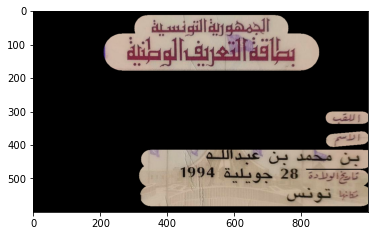

In [25]:

masked = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked)

True

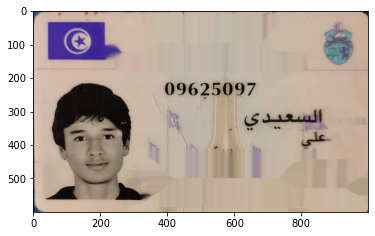

In [26]:
img_inpainted = cv2.inpaint(image, mask, 7, cv2.INPAINT_NS)
plt.imshow(img_inpainted)
cv2.imwrite('noNeeded_text_elimination.jpg', img_inpainted)

# <h2><span style= 'color:noire'>10-position des cibles a utiliser: </h2></span>
---

In [27]:
result[12][0]

[[788.7716559418753, 363.42913985468846],
 [878.7157273860208, 348.29029445633034],
 [885.2283440581247, 399.57086014531154],
 [794.2842726139792, 414.70970554366966]]

In [28]:
result_position_required=[[[386, 206], [672, 206], [672, 262], [386, 262]],[[400, 284], [876, 284], [876, 360], [400, 360]],[[400, 363.42913985468846],
 [885.2283440581247, 348.29029445633034],
 [885.2283440581247, 399.57086014531154],
 [400, 414.70970554366966]]]